In [778]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [779]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [780]:
from sklearn.preprocessing import StandardScaler, RobustScaler 

In [781]:
from sklearn.model_selection import train_test_split

In [782]:
from sklearn.linear_model import LinearRegression, LogisticRegressionCV

In [783]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [784]:
from xgboost import XGBRegressor, XGBClassifier

In [785]:
from lightgbm import LGBMRegressor

In [786]:
from lightgbm import cv as light_gbm_cv

In [787]:
from sklearn.model_selection import RandomizedSearchCV

In [788]:
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, confusion_matrix, \
accuracy_score, recall_score, f1_score

In [789]:
from sklearn.preprocessing import OneHotEncoder

In [790]:
from catboost import CatBoostRegressor

In [791]:
from sklearn.neighbors import KNeighborsRegressor

In [792]:
from sklearn.model_selection import StratifiedKFold

In [793]:
from sklearn.feature_selection import RFECV

In [794]:
import random as rn

In [969]:
from impyute.imputation.cs import mice

In [795]:
pd.set_option('max_rows', 1500)

In [796]:
test_scores = pd.DataFrame()

### Load train.csv

In [797]:
df_main = pd.read_csv('train.csv')

In [798]:
df_main.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [799]:
print('Percentage of null values in df_main dataframe \n',100*df_main.isnull().sum()/df_main.shape[0])

Percentage of null values in df_main dataframe 
 Year                         0.000000
Month                        0.000000
ProductCategory              0.000000
Sales(In ThousandDollars)    5.555556
dtype: float64


In [800]:
df_main.dtypes

Year                           int64
Month                          int64
ProductCategory               object
Sales(In ThousandDollars)    float64
dtype: object

### Load weather data

In [801]:
weather = pd.read_excel('WeatherData.xlsx')

In [802]:
weather.head().T

,0,1,2,3,4
Year,2009,2009,2009,2009,2009
Month,Jan,Jan,Jan,Jan,Jan
Day,1,2,3,4,5
Temp high (°C),-3,1,3,6,6
Temp avg (°C),-6,-2,1,1,5
Temp low (°C),-9,-5,-2,-4,3
Dew Point high (°C),-16,-3,-5,-10,-1
Dew Point avg (°C),-17,-7,-9,-12,-5
Dew Point low (°C),-19,-17,-13,-13,-16
Humidity (%) high,54,78,72,55,62


In [803]:
print('Percentage of null values in weather dataframe \n',100*weather.isnull().sum()/weather.shape[0])

Percentage of null values in weather dataframe 
 Year                            0.000000
Month                           0.000000
Day                             0.000000
Temp high (°C)                  0.000000
Temp avg (°C)                   0.000000
Temp low (°C)                   0.000000
Dew Point high (°C)             0.000000
Dew Point avg (°C)              0.000000
Dew Point low (°C)              0.000000
Humidity (%) high               0.000000
Humidity (%) avg                0.000000
Humidity (%) low                0.000000
Sea Level Press. (hPa) high     0.000000
Sea Level Press. (hPa) avg      0.000000
Sea Level Press. (hPa) low      0.000000
Visibility (km) high            0.000000
Visibility (km) avg             0.000000
Visibility (km) low             0.000000
Wind (km/h) low                 0.000000
Wind (km/h) avg                 0.000000
Wind (km/h) high                0.000000
Precip. (mm) sum                0.000000
WeatherEvent                   61.643836
dtype: f

In [804]:
weather.columns

Index(['Year', 'Month', 'Day', 'Temp high (°C)', 'Temp avg (°C)',
       'Temp low (°C)', 'Dew Point high (°C)', 'Dew Point avg (°C)',
       'Dew Point low (°C)', 'Humidity (%) high', 'Humidity (%) avg',
       'Humidity (%) low', 'Sea Level Press. (hPa) high',
       'Sea Level Press. (hPa) avg', 'Sea Level Press. (hPa) low',
       'Visibility (km) high', 'Visibility (km) avg', 'Visibility (km) low',
       'Wind (km/h) low', 'Wind (km/h) avg', 'Wind (km/h) high',
       'Precip. (mm) sum', 'WeatherEvent'],
      dtype='object')

In [805]:
weather.rename(columns = {'Temp high (°C)':'temp_high', 'Temp avg (°C)':'temp_avg',
       'Temp low (°C)':'temp_low','Dew Point high (°C)':'dew_high', 'Dew Point avg (°C)':'dew_avg',
       'Dew Point low (°C)':'dew_low','Sea Level Press. (hPa) high':'sea_level_high',
       'Sea Level Press. (hPa) avg':'sea_level_avg', 'Sea Level Press. (hPa) low':'sea_level_low',
       'Visibility (km) high':'visibility_high', 'Visibility (km) avg':'visibility_avg',
       'Visibility (km) low':'visibility_low','Wind (km/h) low':'wind_low', 'Wind (km/h) avg':'wind_avg',
       'Wind (km/h) high':'wind_high','Precip. (mm) sum':'perciption_in_mm','Humidity (%) high':'humidity_high',
       'Humidity (%) avg':'humidity_avg','Humidity (%) low':'humidity_low'}, inplace = True)

In [806]:
weather['humidity_avg'] = weather.iloc[:,10]

In [807]:
weather['sea_level_pressure_avg'] = weather.iloc[:,13]

In [808]:
weather['visibility_avg'] = weather.iloc[:,16]

In [809]:
weather['wind_avg'] = weather.iloc[:,19]

In [810]:
weather_new = weather.iloc[:,[0,1,4,7,23,24,25,26,22]]

In [811]:
weather_new

,Year,Month,temp_avg,dew_avg,humidity_avg,sea_level_pressure_avg,visibility_avg,wind_avg,WeatherEvent
0,2009,Jan,-6,-17,43,1023,16,18,NaN
1,2009,Jan,-2,-7,57,1012,13,10,Snow
2,2009,Jan,1,-9,54,1015,16,16,NaN
3,2009,Jan,1,-12,42,1017,16,12,NaN
4,2009,Jan,5,-5,48,1014,16,11,NaN
5,2009,Jan,2,-11,54,1015,14,11,Rain
6,2009,Jan,2,1,91,994,8,17,Rain
7,2009,Jan,1,-6,63,997,16,18,NaN
8,2009,Jan,-2,-11,51,1016,16,16,NaN
9,2009,Jan,-3,-7,69,1022,8,11,"Fog , Rain , Snow"


In [812]:
weather_new['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [813]:
weather_month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}

In [814]:
weather_new['Month'] = weather_new['Month'].map(weather_month_map)

In [815]:
weather_new.dtypes

Year                       int64
Month                      int64
temp_avg                   int64
dew_avg                    int64
humidity_avg               int64
sea_level_pressure_avg     int64
visibility_avg             int64
wind_avg                  object
WeatherEvent              object
dtype: object

### Load holidays data

In [816]:
holidays = pd.read_excel('Events_HolidaysData.xlsx')

In [817]:
holidays.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [818]:
print('Percentage of null values in holidays dataframe \n',100*holidays.isnull().sum()/holidays.shape[0])

Percentage of null values in holidays dataframe 
 Year           0.0
MonthDate      0.0
Event          0.0
DayCategory    0.0
dtype: float64


In [819]:
holidays['MonthDate'] = holidays['MonthDate'].astype(str)

In [820]:
holidays['Month'] = holidays['MonthDate'].map(lambda x : x[5:7])

In [821]:
holidays.drop(['MonthDate'], axis = 1, inplace = True)

In [822]:
holidays.dtypes

Year            int64
Event          object
DayCategory    object
Month          object
dtype: object

In [823]:
holidays

,Year,Event,DayCategory,Month
0,2009,New Year's Day,Federal Holiday,01
1,2009,Martin Luther King Jr. Day,Federal Holiday,01
2,2009,Valentine's Day,Event,02
3,2009,Presidents' Day,Federal Holiday,02
4,2009,Easter Sunday,Event,04
5,2009,Mother's Day,Event,05
6,2009,Memorial Day,Federal Holiday,05
7,2009,Father's Day,Event,06
8,2009,'Independence Day' observed,Federal Holiday,07
9,2009,Independence Day,Federal Holiday,07


In [824]:
def holiday_month(x):
    if x[0] == '0':
        return x[1]
    else:
        return x

In [825]:
holidays['Month'] = holidays['Month'].apply(holiday_month)

In [826]:
holidays_per_month = holidays.groupby(['Year','Month'])['Month'].count().to_frame(name = 'number_of_holidays_per_month')

In [827]:
holidays_per_month.reset_index(inplace = True)

In [828]:
holidays_per_month['Month'] = holidays_per_month['Month'].astype(int)

In [829]:
holidays_per_month

,Year,Month,number_of_holidays_per_month
0,2009,1,2
1,2009,10,2
2,2009,11,2
3,2009,12,3
4,2009,2,2
5,2009,4,1
6,2009,5,2
7,2009,6,1
8,2009,7,2
9,2009,9,1


### Load economy data

In [830]:
economy = pd.read_excel('macro_economic.xlsx')

In [831]:
economy.head().T

,0,1,2,3,4
Year-Month,2009 - Jan,2009 - Feb,2009 - Mar,2009 - Apr,2009 - May
Monthly Nominal GDP Index (inMillion$),14421.8,14389.2,14340.7,14326.8,14345.9
Monthly Real GDP Index (inMillion$),14407.1,14366.2,14351.8,14351.6,14368.1
CPI,233.402,234.663,235.067,235.582,235.975
PartyInPower,Democrats,Democrats,Democrats,Democrats,Democrats
unemployment rate,7.8,8.3,8.7,9,9.4
CommercialBankInterestRateonCreditCardPlans,12.03,12.97,12.97,12.97,13.32
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",11.44,11.05,11.05,11.05,11.25
Earnings or wages in dollars per hour,22.05,22.22,22.22,22.13,22.04
AdvertisingExpenses (in Thousand Dollars),137,200,?,214,?


In [832]:
economy.shape

(96, 18)

In [833]:
print('Percentage of null values in economy dataframe \n', 100*economy.isnull().sum()/economy.shape[0])

Percentage of null values in economy dataframe 
 Year-Month                                                           0.0
Monthly Nominal GDP Index (inMillion$)                               0.0
Monthly Real GDP Index (inMillion$)                                  0.0
CPI                                                                  0.0
PartyInPower                                                         0.0
unemployment rate                                                    0.0
CommercialBankInterestRateonCreditCardPlans                          0.0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    0.0
Earnings or wages  in dollars per hour                               0.0
AdvertisingExpenses (in Thousand Dollars)                            0.0
Cotton Monthly Price - US cents per Pound(lbs)                       0.0
Change(in%)                                                          0.0
Average upland planted(million acres)                                0.0
Av

In [834]:
economy['Year'] = economy['Year-Month'].map(lambda x : x[0:4])

In [835]:
economy['Month'] = economy['Year-Month'].map(lambda x : x[7:])

In [836]:
economy.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,Jan
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,Feb
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,Mar
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,Apr
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,May


In [837]:
(economy['AdvertisingExpenses (in Thousand Dollars)'] == '?').sum()

85

In [838]:
economy.rename({'Monthly Nominal GDP Index (inMillion$)':'GDP','unemployment rate':'unemployment',
                'CommercialBankInterestRateonCreditCardPlans':'credit_card_loan_rate',
                'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan':'house_loan',
                'Earnings or wages in dollars per hour':'wages',
                'Cotton Monthly Price - US cents per Pound(lbs)':'cotton_production',
                'yieldperharvested acre':'harvest'}, inplace = True)

In [839]:
economy_new = pd.DataFrame()

In [840]:
economy_new['Year'] = economy['Year']

In [841]:
economy_new['Month'] = economy['Month']

In [842]:
economy_new['GDP'] = economy['Monthly Nominal GDP Index (inMillion$)']

In [843]:
economy_new['unemployement_rate'] = economy['unemployment rate']

In [844]:
economy_new['credit_card_rate'] = economy['CommercialBankInterestRateonCreditCardPlans']

In [845]:
economy_new['personal_loan_rate'] = economy['Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan']

In [846]:
economy_new['wages'] = economy['Earnings or wages  in dollars per hour']

In [847]:
economy_new['cotton_price_per_month'] = economy['Cotton Monthly Price - US cents per Pound(lbs)']

In [848]:
economy_new['mill_use'] = economy['Mill use  (in  480-lb netweright in million bales)']

In [849]:
economy_new['Exports'] = economy['Exports']

In [850]:
economy_month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}

In [851]:
economy_new['Month'] = economy_new['Month'].map(economy_month_map)

In [852]:
economy_new

,Year,Month,GDP,unemployement_rate,credit_card_rate,personal_loan_rate,wages,cotton_price_per_month,mill_use,Exports
0,2009,1,14421.752895,7.8,12.03,11.44,22.05,57.70,4.170,11.550
1,2009,2,14389.200466,8.3,12.97,11.05,22.22,55.21,3.870,11.100
2,2009,3,14340.701639,8.7,12.97,11.05,22.22,51.50,3.720,11.650
3,2009,4,14326.815525,9.0,12.97,11.05,22.13,56.78,3.620,12.225
4,2009,5,14345.904809,9.4,13.32,11.25,22.04,61.95,3.520,12.300
5,2009,6,14348.530666,9.5,13.32,11.25,21.96,61.39,3.470,10.300
6,2009,7,14317.372922,9.5,13.32,11.25,22.00,64.80,3.470,9.700
7,2009,8,14424.284901,9.6,13.71,10.89,22.16,64.26,3.470,9.700
8,2009,9,14410.777177,9.8,13.71,10.89,22.20,64.07,3.470,10.000
9,2009,10,14596.605447,10.0,13.71,10.89,22.27,66.82,3.370,10.000


In [853]:
economy_new.dtypes

Year                       object
Month                       int64
GDP                       float64
unemployement_rate        float64
credit_card_rate          float64
personal_loan_rate        float64
wages                     float64
cotton_price_per_month    float64
mill_use                  float64
Exports                   float64
dtype: object

In [854]:
economy_new['Year'] = economy_new['Year'].astype(int)

### EDA

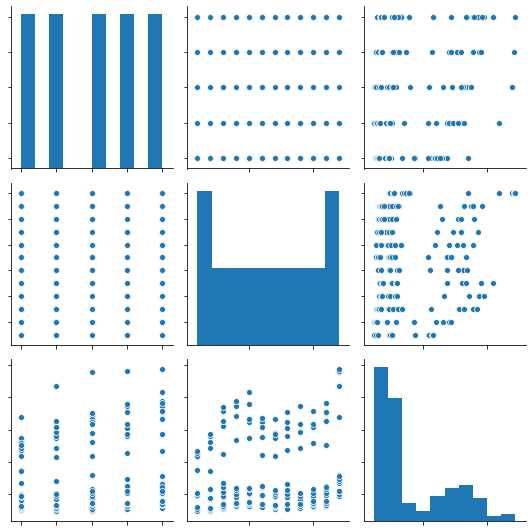

In [855]:
sns.pairplot(df_main)
plt.show()

In [856]:
df_main['ProductCategory'] = df_main['ProductCategory'].map({'MenClothing':0, 
                                    'WomenClothing':1, 'OtherClothing':2})

df_sales_mean = df_main.groupby(['ProductCategory'])['Sales(In ThousandDollars)'].mean().to_frame().reset_index()

df_sales_mean

In [857]:
#df_main[(df_main['ProductCategory'] == 0)]['Sales(In ThousandDollars)'].replace(np.nan, 660.40, inplace = True)

In [858]:
#df_main[(df_main['ProductCategory'] == 2)]['Sales(In ThousandDollars)'].replace(np.nan,1071.68, inplace = True)

In [859]:
#df_main[(df_main['ProductCategory'] == 1)]['Sales(In ThousandDollars)'].replace(np.nan,3108.55, inplace = True)

### Imputing NULL values of sales by taking mean, according to product category 

In [860]:
df_dummies_ProductCategory = pd.get_dummies(df_main['ProductCategory'], drop_first=True, prefix='Prd_Cat_')

In [861]:
df_dummies_Month = pd.get_dummies(df_main['Month'], drop_first=True, prefix='Month')

In [862]:
df_month_main = df_main['Month']

In [863]:
df_main = pd.concat([df_dummies_Month,df_dummies_ProductCategory,df_main], axis = 1 )

In [864]:
df_main.drop(['ProductCategory','Month'], axis = 1, inplace = True)

In [865]:
df_main.head()

,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Prd_Cat__1,Prd_Cat__2,Year,Sales(In ThousandDollars)
0,0,0,0,0,0,0,0,0,0,0,0,1,0,2009,1755.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,524.0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,936.0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,2009,1729.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,2009,496.0


### Imputing null values using Models on train.csv

In [866]:
df_main_Sales_notNull = df_main[df_main['Sales(In ThousandDollars)'].isnull() == False]

In [867]:
df_main_Sales_Null = df_main[df_main['Sales(In ThousandDollars)'].isnull() == True]

In [868]:
df_main_Sales_Null.drop(['Sales(In ThousandDollars)'], axis = 1, inplace = True)

In [971]:
df_main_mice = mice(df_main.values)

LinAlgError: SVD did not converge in Linear Least Squares

In [869]:
X = df_main_Sales_notNull.drop(['Sales(In ThousandDollars)'], axis = 1)

In [870]:
y = df_main_Sales_notNull['Sales(In ThousandDollars)']

In [871]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

lr_impute = LinearRegression(normalize=True, n_jobs=-1)
lr_impute.fit(X_train, y_train)
y_predict_lr = lr_impute.predict(X_test)
print('R2_score is -- ', r2_score(y_test, y_predict_lr))
print('Root Mean Squared error - ', np.sqrt(mean_squared_error(y_test, y_predict_lr)))

### KNN

In [872]:
grid = {'n_neighbors':list(range(3,15))
       }

knn_impute = KNeighborsRegressor()
random_search = RandomizedSearchCV(knn_impute, param_distributions=grid, n_iter=20, 
                                   scoring='neg_mean_squared_error',cv = 20)


random_search.fit(X_train, y_train)
y_predict_knn = random_search.predict(X_test)
print('R2_score is -- ', r2_score(y_test, y_predict_knn))
print('Root Mean Squared error - ', np.sqrt(mean_squared_error(y_test, y_predict_knn)))
print('\nAll results\n')
print(random_search.cv_results_)
print('\nBest estimator')
print(random_search.best_estimator_)
print('\nBest params')
print(random_search.best_params_)

R2_score is --  0.754385667279488
Root Mean Squared error -  618.1374017570693

All results

{'mean_fit_time': array([0.00178624, 0.00176977, 0.0018093 , 0.00166622, 0.00160797,
       0.00185776, 0.00137839, 0.00126659, 0.00123649, 0.00118126,
       0.00125039, 0.00153521]), 'std_fit_time': array([1.08958894e-04, 8.42420420e-05, 1.00838373e-04, 6.23121575e-05,
       3.57502359e-05, 2.60761442e-04, 1.71508380e-04, 3.50521938e-06,
       4.49221097e-05, 9.73830456e-06, 1.67735689e-04, 1.32614605e-04]), 'mean_score_time': array([0.00121069, 0.00118865, 0.00125736, 0.0011391 , 0.00110369,
       0.00128076, 0.0009095 , 0.00085584, 0.00083288, 0.00080581,
       0.00084713, 0.00106027]), 'std_score_time': array([9.34558254e-05, 2.73420974e-05, 1.31725302e-04, 3.34846035e-05,
       3.52587627e-05, 2.07195360e-04, 8.67988403e-05, 3.97614361e-06,
       3.26053664e-05, 3.06661906e-05, 8.25155611e-05, 8.24250959e-05]), 'param_n_neighbors': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12,

### RF

In [873]:
grid = {'n_estimators':list(range(101,1300,100)),
                             'max_depth':list(range(1,10))
}
rf_impute = RandomForestRegressor(verbose=1)

random_search_rf = RandomizedSearchCV(rf_impute, param_distributions=grid,
                                   n_iter=20, scoring='neg_mean_squared_error', cv = 10)

random_search_rf.fit(X_train, y_train)
y_predict_rf = random_search_rf.predict(X_test)
print('R2_score is -- ', r2_score(y_test, y_predict_rf))
print('Root Mean Squared error - ', np.sqrt(mean_squared_error(y_test, y_predict_rf)))
print('\nAll results\n')
print(random_search_rf.cv_results_)
print('\nBest estimator')
print(random_search_rf.best_estimator_)
print('\nBest params')
print(random_search_rf.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 501 out of 501 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 801 out of 801 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 701 out of 701 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 701 out of 701 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1001 out of 1001 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1001 out of 1001 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1001 out of 1001 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1001 out of 1001 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1001 out of 1001 | elapsed:    0.6s finished
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1201 out of 1201 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1201 out of 1201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1201 out of 1201 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1201 out of 1201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1201 out of 1201 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1201 out of 1201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

R2_score is --  0.9685295701489398
Root Mean Squared error -  221.26336181258995

All results

{'mean_fit_time': array([0.72455885, 0.27170737, 0.33099132, 0.38759918, 0.75311749,
       0.63193133, 0.77227383, 0.29525821, 0.16306276, 0.95227454,
       0.51256375, 0.96940284, 0.32001867, 0.40798485, 0.83206148,
       0.35032587, 0.82616808, 0.24968591, 0.43063385, 0.23762619]), 'std_fit_time': array([0.04786055, 0.02998473, 0.02862647, 0.02297719, 0.02169842,
       0.03896332, 0.02431935, 0.01645059, 0.01236963, 0.03400801,
       0.0344236 , 0.11116549, 0.00647857, 0.02919437, 0.10742483,
       0.03095937, 0.01757687, 0.0354379 , 0.04795661, 0.02659859]), 'mean_score_time': array([0.0295296 , 0.01571159, 0.01826599, 0.01903639, 0.03650465,
       0.03057401, 0.04944949, 0.0157259 , 0.00870767, 0.03974342,
       0.02541196, 0.04444013, 0.01523075, 0.01832478, 0.03304849,
       0.01941407, 0.03951764, 0.01517143, 0.02182271, 0.01636446]), 'std_score_time': array([0.00334992, 0.001

[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    0.0s finished


### XGB

In [874]:
grid = {'max_depth':list(range(1,10)),
        'n_estimators':list(range(101,1300,100))
}
xg_impute = XGBRegressor()


random_search_xg = RandomizedSearchCV(xg_impute, param_distributions=grid,
                                   n_iter=20, scoring='neg_mean_squared_error',cv = 10)

random_search_xg.fit(X_train, y_train)
y_predict_xg = random_search_xg.predict(X_test)
print('R2_score is -- ', r2_score(y_test, y_predict_xg))
print('Root Mean Squared error - ', np.sqrt(mean_squared_error(y_test, y_predict_xg)))


print('\nAll results :\n')
print(random_search_xg.cv_results_)
print('\nBest estimator : ')
print(random_search_xg.best_estimator_)
print('\nBest params : ')
print(random_search_xg.best_params_)

[19:15:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:15:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:15:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [875]:
y_predict_imputed_xg = random_search_xg.predict(df_main_Sales_Null)

In [876]:
df_main_Sales_Null['Sales(In ThousandDollars)'] = y_predict_imputed_xg

In [877]:
df_main_final = pd.concat([df_main_Sales_notNull, df_main_Sales_Null ], axis = 0)

### Imputing null values using models on weather data

In [878]:
weather_new.head()

,Year,Month,temp_avg,dew_avg,humidity_avg,sea_level_pressure_avg,visibility_avg,wind_avg,WeatherEvent
0,2009,1,-6,-17,43,1023,16,18,NaN
1,2009,1,-2,-7,57,1012,13,10,Snow
2,2009,1,1,-9,54,1015,16,16,NaN
3,2009,1,1,-12,42,1017,16,12,NaN
4,2009,1,5,-5,48,1014,16,11,NaN


In [879]:
weather_new['wind_avg'].unique()

array([18, 10, 16, 12, 11, 17, 9, 14, 15, 4, 13, 8, 7, 6, 22, 19, 21, 24,
       5, '-', 0, 2, 3, 20, 23, 25], dtype=object)

In [880]:
weather_new[weather_new['wind_avg'] == '-']

,Year,Month,temp_avg,dew_avg,humidity_avg,sea_level_pressure_avg,visibility_avg,wind_avg,WeatherEvent
143,2009,5,22,16,73,1016,14,-,NaN
144,2009,5,22,12,55,1016,16,-,NaN
177,2009,6,22,17,76,1006,15,-,Rain


In [881]:
weather_new[(weather_new['WeatherEvent'] == 'Rain') & (weather_new['Month'] == 5)].mean()

Year                      2009.0
Month                        5.0
temp_avg                    14.8
dew_avg                     11.1
humidity_avg                80.9
sea_level_pressure_avg    1016.6
visibility_avg               9.5
wind_avg                     8.1
dtype: float64

In [882]:
weather_new['wind_avg'].replace('-', 8, inplace = True)

In [883]:
weather_event_not_null = weather_new[~(weather_new['WeatherEvent'].isnull())]

In [884]:
weather_event_null = weather_new[(weather_new['WeatherEvent'].isnull())]

In [885]:
weather_event_null.drop(['WeatherEvent'], axis = 1, inplace = True)

In [886]:
weather_event_not_null

,Year,Month,temp_avg,dew_avg,humidity_avg,sea_level_pressure_avg,visibility_avg,wind_avg,WeatherEvent
1,2009,1,-2,-7,57,1012,13,10,Snow
5,2009,1,2,-11,54,1015,14,11,Rain
6,2009,1,2,1,91,994,8,17,Rain
9,2009,1,-3,-7,69,1022,8,11,"Fog , Rain , Snow"
10,2009,1,-2,-5,78,1011,13,11,Rain
14,2009,1,-7,-13,66,1023,9,12,Snow
17,2009,1,-2,-4,78,1013,7,9,"Fog , Snow"
18,2009,1,-1,-3,78,1005,7,4,"Fog , Snow"
27,2009,1,1,-1,70,1012,5,15,"Fog , Rain , Snow"
29,2009,1,-1,-7,60,1012,14,11,Snow


In [887]:
weather_event_not_null.isnull().sum()

Year                      0
Month                     0
temp_avg                  0
dew_avg                   0
humidity_avg              0
sea_level_pressure_avg    0
visibility_avg            0
wind_avg                  0
WeatherEvent              0
dtype: int64

In [888]:
weather_event_not_null.dtypes

Year                       int64
Month                      int64
temp_avg                   int64
dew_avg                    int64
humidity_avg               int64
sea_level_pressure_avg     int64
visibility_avg             int64
wind_avg                   int64
WeatherEvent              object
dtype: object

In [889]:
weather_event_not_null['WeatherEvent'].unique()

array(['Snow', 'Rain', 'Fog , Rain , Snow', 'Fog , Snow', 'Rain , Snow',
       'Fog', 'Fog , Rain'], dtype=object)

In [890]:
WeatherEvent_Map = {'Snow':'Snow', 'Rain':'Rain', 'Fog':'Fog', 'Fog , Rain , Snow':'Rain',
                    'Fog , Snow':'Snow', 'Rain , Snow':'Rain', 'Fog , Rain':'Rain'}

In [891]:
weather_event_not_null['WeatherEvent'] = weather_event_not_null['WeatherEvent'].map(WeatherEvent_Map)

In [892]:
weather_event_not_null['WeatherEvent'].unique()

array(['Snow', 'Rain', 'Fog'], dtype=object)

In [893]:
snow_fog_rain_map = {'Snow':0, 'Rain':1, 'Fog':0}

In [894]:
weather_event_not_null['WeatherEvent'] = weather_event_not_null['WeatherEvent'].map(snow_fog_rain_map)

In [895]:
weather_event_not_null.head()

,Year,Month,temp_avg,dew_avg,humidity_avg,sea_level_pressure_avg,visibility_avg,wind_avg,WeatherEvent
1,2009,1,-2,-7,57,1012,13,10,0
5,2009,1,2,-11,54,1015,14,11,1
6,2009,1,2,1,91,994,8,17,1
9,2009,1,-3,-7,69,1022,8,11,1
10,2009,1,-2,-5,78,1011,13,11,1


In [896]:
X = weather_event_not_null.drop(['WeatherEvent'], axis = 1)

In [897]:
y = weather_event_not_null['WeatherEvent']

In [898]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 0)

### RandomForest Classifier

In [899]:
xg_impute_weather = RandomForestClassifier( n_estimators=1000)

xg_impute_weather.fit(X_train, y_train)
y_predict_xg = xg_impute_weather.predict(X_test)
print('Accuracy score -- ', accuracy_score(y_test, y_predict_xg))
print('ROC AUC score - ', roc_auc_score(y_test, y_predict_xg))


Accuracy score --  0.9523809523809523
ROC AUC score -  0.75


In [900]:
xg_impute_weather = XGBClassifier(n_estimators=1000)

xg_impute_weather.fit(X_train, y_train)
y_predict_xg = xg_impute_weather.predict(X_test)
print('Accuracy score -- ', accuracy_score(y_test, y_predict_xg))
print('ROC AUC score - ', roc_auc_score(y_test, y_predict_xg))


Accuracy score --  0.9523809523809523
ROC AUC score -  0.75


### Logistic Regression

In [901]:
xg_impute_weather = LogisticRegressionCV()

xg_impute_weather.fit(X_train, y_train)
y_predict_xg = xg_impute_weather.predict(X_test)
print('Accuracy score -- ', accuracy_score(y_test, y_predict_xg))
print('ROC AUC score - ', roc_auc_score(y_test, y_predict_xg))


Accuracy score --  0.9047619047619048
ROC AUC score -  0.5


### XGB Classifier with CV

In [902]:
grid = {'max_depth':list(range(1,10)),
        'n_estimators':list(range(101,1300,100))
}
xg_impute = XGBClassifier()


random_search_xg = RandomizedSearchCV(xg_impute, param_distributions=grid,
                                   n_iter=20, scoring='accuracy', cv = 10)

random_search_xg.fit(X_train, y_train)
y_predict_xg = random_search_xg.predict(X_test)
print('Accuracy -- ', accuracy_score(y_test, y_predict_xg))
print('ROC-AUC score',  roc_auc_score(y_test, y_predict_xg))


print('\nAll results :\n')
print(random_search_xg.cv_results_)
print('\nBest estimator : ')
print(random_search_xg.best_estimator_)
print('\nBest params : ')
print(random_search_xg.best_params_)

Accuracy --  0.9761904761904762
ROC-AUC score 0.875

All results :

{'mean_fit_time': array([0.0543853 , 0.05407352, 0.05868051, 0.005902  , 0.04523952,
       0.03165641, 0.05406489, 0.0354979 , 0.04089699, 0.03822873,
       0.04176216, 0.0197783 , 0.03923442, 0.01478159, 0.05054824,
       0.01295671, 0.0383091 , 0.01775088, 0.04177845, 0.05296421]), 'std_fit_time': array([0.00838507, 0.01005595, 0.00762067, 0.00058277, 0.00787982,
       0.00312629, 0.01155201, 0.0039422 , 0.00659481, 0.0063506 ,
       0.00607866, 0.00286358, 0.00613887, 0.00171317, 0.0086535 ,
       0.00179071, 0.00613413, 0.00193723, 0.00468304, 0.00704905]), 'mean_score_time': array([0.0008971 , 0.00090182, 0.00113089, 0.00084236, 0.00085506,
       0.00105681, 0.00092587, 0.0008599 , 0.00086994, 0.00094094,
       0.00081749, 0.00074091, 0.00078876, 0.00070798, 0.0008539 ,
       0.00093353, 0.00076785, 0.0006402 , 0.00091536, 0.00085902]), 'std_score_time': array([1.97809016e-04, 1.90698419e-04, 1.05853019e-

In [903]:
y_predict_xgb_imputed_weather = random_search_xg.predict(weather_event_null)

In [904]:
weather_event_null['WeatherEvent'] = y_predict_xgb_imputed_weather

In [905]:
weather_concat_df = pd.concat([weather_event_not_null, weather_event_null], axis = 0)

In [906]:
weather_concat_df

,Year,Month,temp_avg,dew_avg,humidity_avg,sea_level_pressure_avg,visibility_avg,wind_avg,WeatherEvent
1,2009,1,-2,-7,57,1012,13,10,0
5,2009,1,2,-11,54,1015,14,11,1
6,2009,1,2,1,91,994,8,17,1
9,2009,1,-3,-7,69,1022,8,11,1
10,2009,1,-2,-5,78,1011,13,11,1
14,2009,1,-7,-13,66,1023,9,12,0
17,2009,1,-2,-4,78,1013,7,9,0
18,2009,1,-1,-3,78,1005,7,4,0
27,2009,1,1,-1,70,1012,5,15,1
29,2009,1,-1,-7,60,1012,14,11,0


In [907]:
df = weather_concat_df.groupby('Month')['WeatherEvent'].value_counts().\
to_frame(name= 'count_of_season').reset_index()

In [908]:
df

,Month,WeatherEvent,count_of_season
0,1,0,20
1,1,1,11
2,2,1,20
3,2,0,8
4,3,1,26
5,3,0,5
6,4,1,30
7,5,1,31
8,6,1,30
9,7,1,31


In [909]:
weather_final = pd.DataFrame({'Month':[1,2,3,4,5,6,7,8,9,10,11,12], 'WeatherEvent':[0,0,0,1,1,1,1,1,1,1,1,0]})

### Joining dataframes

In [910]:
df_main_final.columns

Index(['Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Prd_Cat__1',
       'Prd_Cat__2', 'Year', 'Sales(In ThousandDollars)'],
      dtype='object')

In [911]:
df_main_final.drop(columns = ['Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9',
                              'Month_10','Month_11','Month_12'], inplace = True)

In [912]:
df_main_final['Month'] = df_month_main

In [913]:
frames = [df_main_final,weather_final,holidays_per_month,economy_new]

In [914]:
df1 = df_main_final.merge(weather_final, how = 'left')

In [915]:
df2 = df1.merge(holidays_per_month,  how = 'left', )

In [916]:
df_final = df2.merge(economy_new, how = 'left')

In [917]:
df_final.fillna(0, inplace =True)

In [918]:
df_final

,Prd_Cat__1,Prd_Cat__2,Year,Sales(In ThousandDollars),Month,WeatherEvent,number_of_holidays_per_month,GDP,unemployement_rate,credit_card_rate,personal_loan_rate,wages,cotton_price_per_month,mill_use,Exports
0,1,0,2009,1755.000000,1,0,2.0,14421.752895,7.8,12.03,11.44,22.05,57.70,4.170,11.550
1,0,0,2009,524.000000,1,0,2.0,14421.752895,7.8,12.03,11.44,22.05,57.70,4.170,11.550
2,0,1,2009,936.000000,1,0,2.0,14421.752895,7.8,12.03,11.44,22.05,57.70,4.170,11.550
3,1,0,2009,1729.000000,2,0,2.0,14389.200466,8.3,12.97,11.05,22.22,55.21,3.870,11.100
4,0,0,2009,496.000000,2,0,2.0,14389.200466,8.3,12.97,11.05,22.22,55.21,3.870,11.100
5,0,1,2009,859.000000,2,0,2.0,14389.200466,8.3,12.97,11.05,22.22,55.21,3.870,11.100
6,1,0,2009,2256.000000,3,0,0.0,14340.701639,8.7,12.97,11.05,22.22,51.50,3.720,11.650
7,0,0,2009,542.000000,3,0,0.0,14340.701639,8.7,12.97,11.05,22.22,51.50,3.720,11.650
8,0,1,2009,921.000000,3,0,0.0,14340.701639,8.7,12.97,11.05,22.22,51.50,3.720,11.650
9,1,0,2009,2662.000000,4,1,1.0,14326.815525,9.0,12.97,11.05,22.13,56.78,3.620,12.225


In [919]:
df_final.dtypes

Prd_Cat__1                        uint8
Prd_Cat__2                        uint8
Year                              int64
Sales(In ThousandDollars)       float64
Month                             int64
WeatherEvent                      int64
number_of_holidays_per_month    float64
GDP                             float64
unemployement_rate              float64
credit_card_rate                float64
personal_loan_rate              float64
wages                           float64
cotton_price_per_month          float64
mill_use                        float64
Exports                         float64
dtype: object

In [920]:
month_dummies = pd.get_dummies(df_final['Month'], drop_first=True, prefix='month_')

In [922]:
df_final_month_dummies = pd.concat([month_dummies,df_final], axis = 1)

In [923]:
df_final_month_dummies.drop(['Month'], axis = 1, inplace = True)

### Model Building on data

In [924]:
X = df_final_month_dummies.drop(['Sales(In ThousandDollars)'], axis = 1)

In [925]:
y = df_final_month_dummies.loc[:,'Sales(In ThousandDollars)']

In [926]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 0)

In [927]:
X_train

,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,...,WeatherEvent,number_of_holidays_per_month,GDP,unemployement_rate,credit_card_rate,personal_loan_rate,wages,cotton_price_per_month,mill_use,Exports
40,1,0,0,0,0,0,0,0,0,0,...,0,2.0,14652.880272,9.8,14.26,10.83,22.57,80.04,3.370,11.400
74,1,0,0,0,0,0,0,0,0,0,...,0,2.0,15161.578331,9.0,13.44,10.98,22.99,213.18,3.565,15.280
22,0,0,0,0,0,0,1,0,0,0,...,1,0.0,14424.284901,9.6,13.71,10.89,22.16,64.26,3.470,9.700
110,0,0,1,0,0,0,0,0,0,0,...,1,1.0,16091.228100,8.2,12.34,10.89,23.61,100.10,3.373,10.750
111,0,0,1,0,0,0,0,0,0,0,...,1,1.0,16091.228100,8.2,12.34,10.89,23.61,100.10,3.373,10.750
129,0,0,0,0,0,0,0,0,0,1,...,1,3.0,16272.706227,7.7,11.88,10.64,23.58,80.87,3.375,10.875
96,0,0,0,0,0,0,0,0,0,1,...,1,2.0,15775.006068,8.6,12.36,10.36,23.15,104.68,3.775,10.625
90,0,0,0,0,0,0,1,0,0,0,...,1,0.0,15649.038136,9.0,12.28,10.80,22.85,114.10,3.770,11.650
116,0,0,0,0,1,0,0,0,0,0,...,1,1.0,16152.365937,8.2,12.06,10.94,23.27,82.18,3.470,11.100
27,0,0,0,0,0,0,0,0,1,0,...,1,2.0,14596.605447,10.0,13.71,10.89,22.27,66.82,3.370,10.000


sc = StandardScaler()

sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict_lr = lr.predict(X_test)
print('R2_score is -- ', r2_score(y_test, y_predict_lr))
print('Root Mean Squared error - ', np.sqrt(mean_squared_error(y_test, y_predict_lr)))

In [928]:
sc=StandardScaler() 
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

### KNN

In [929]:
grid = {'n_neighbors':list(range(3,15)),
       }

knn_impute = KNeighborsRegressor()
random_search = RandomizedSearchCV(knn_impute, param_distributions=grid, n_iter=20, 
                                   scoring='neg_mean_squared_error', cv = 20)
random_search.fit(scaledX_train, y_train)
y_predict_knn = random_search.predict(scaledX_test)
print('R2_score is -- ', r2_score(y_test, y_predict_knn))
print('Root Mean Squared error - ', np.sqrt(mean_squared_error(y_test, y_predict_knn)))
print('\nAll results\n')
print(random_search.cv_results_)
print('\nBest estimator')
print(random_search.best_estimator_)
print('\nBest params')
print(random_search.best_params_)

R2_score is --  0.398252040069508
Root Mean Squared error -  891.377545591124

All results

{'mean_fit_time': array([0.00062518, 0.00057487, 0.00057542, 0.00058836, 0.00058438,
       0.0006068 , 0.0005844 , 0.00058675, 0.00059066, 0.00057791,
       0.00059199, 0.00058341]), 'std_fit_time': array([1.03326569e-04, 1.13907205e-05, 1.30503414e-05, 2.22013500e-05,
       4.47456781e-05, 5.44725097e-05, 2.72801571e-05, 3.39585400e-05,
       2.97848078e-05, 2.43877239e-05, 4.75269961e-05, 3.83650981e-05]), 'mean_score_time': array([0.00069267, 0.00066451, 0.00066452, 0.00067502, 0.00067101,
       0.00067017, 0.00067577, 0.00069709, 0.00067115, 0.00065622,
       0.00067078, 0.00066606]), 'std_score_time': array([6.88110416e-05, 4.12574568e-05, 1.37034902e-05, 3.48640096e-05,
       4.52409164e-05, 1.87823154e-05, 3.58036444e-05, 8.41992892e-05,
       9.84931361e-06, 1.08469711e-05, 3.40075062e-05, 8.29829385e-06]), 'param_n_neighbors': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 

### Random forest

In [930]:
rf = RandomForestRegressor()

In [931]:
param_dist = {'n_estimators' : list(range(101,1300,100)),
              "max_depth": list(range(2,12)),
              "min_samples_split": list(range(2,12)),
              "min_samples_leaf":  list(range(2,12)),
              "bootstrap": [True, False]
             }

In [932]:
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20)
random_search.fit(scaledX_train,y_train)
y_predict_rf = random_search.predict(scaledX_test)

print('R2_score is -- ', r2_score(y_test, y_predict_knn))
print('Root Mean Squared error - ', np.sqrt(mean_squared_error(y_test, y_predict_knn)))
print('\nAll results\n')
print(random_search.cv_results_)
print('\nBest estimator')
print(random_search.best_estimator_)
print('\nBest params')
print(random_search.best_params_)

R2_score is --  0.398252040069508
Root Mean Squared error -  891.377545591124

All results

{'mean_fit_time': array([0.56451098, 0.69213843, 0.23653634, 0.98090299, 0.87423245,
       0.69088125, 0.40818357, 0.91600172, 0.08260179, 0.72278166,
       0.78731004, 0.4580303 , 0.21674013, 0.27283597, 0.5726974 ,
       0.12287299, 0.08829284, 0.24662201, 0.71217402, 0.21476404]), 'std_fit_time': array([0.04967849, 0.01980191, 0.01629685, 0.06484021, 0.01643758,
       0.02848701, 0.02034463, 0.11282305, 0.00340262, 0.0478197 ,
       0.01606158, 0.01582983, 0.00735048, 0.01755385, 0.01115397,
       0.00110573, 0.00337853, 0.00510485, 0.01413425, 0.00138217]), 'mean_score_time': array([0.02211372, 0.03067199, 0.01183136, 0.03572615, 0.04505014,
       0.03193871, 0.02030269, 0.03387197, 0.00412083, 0.03723605,
       0.03650586, 0.02213597, 0.0107193 , 0.01491809, 0.02316928,
       0.00638858, 0.00370089, 0.00923705, 0.03450743, 0.00887418]), 'std_score_time': array([3.65101760e-03, 1.22

### XGB

In [933]:
xg = XGBRegressor(n_jobs=4, learning_rate = 0.02)

In [934]:
grid = {'max_depth':list(range(4,14)),
        'n_estimators':list(range(101, 1400,100))
}

random_cv = RandomizedSearchCV(xg, param_distributions=grid, n_iter=20,
    scoring='neg_mean_squared_error',
    refit=True,
    cv=20,
    verbose=1)
random_cv.fit(scaledX_train,y_train)
y_predict_xg = random_cv.predict(scaledX_test)



Fitting 20 folds for each of 20 candidates, totalling 400 fits
[19:19:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[19:19:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:20:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:21:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:23:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:24:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:25:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  5.9min finished


[19:25:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [935]:
print('\nAll results\n')
print(random_search.cv_results_)
print('\nBest estimator')
print(random_search.best_estimator_)
print('\nBest params')
print(random_search.best_params_)
print('R2_score -- ',r2_score(y_test, y_predict_xg))
print('RMSE -',np.sqrt(mean_squared_error(y_test, y_predict_xg)))


All results

{'mean_fit_time': array([0.56451098, 0.69213843, 0.23653634, 0.98090299, 0.87423245,
       0.69088125, 0.40818357, 0.91600172, 0.08260179, 0.72278166,
       0.78731004, 0.4580303 , 0.21674013, 0.27283597, 0.5726974 ,
       0.12287299, 0.08829284, 0.24662201, 0.71217402, 0.21476404]), 'std_fit_time': array([0.04967849, 0.01980191, 0.01629685, 0.06484021, 0.01643758,
       0.02848701, 0.02034463, 0.11282305, 0.00340262, 0.0478197 ,
       0.01606158, 0.01582983, 0.00735048, 0.01755385, 0.01115397,
       0.00110573, 0.00337853, 0.00510485, 0.01413425, 0.00138217]), 'mean_score_time': array([0.02211372, 0.03067199, 0.01183136, 0.03572615, 0.04505014,
       0.03193871, 0.02030269, 0.03387197, 0.00412083, 0.03723605,
       0.03650586, 0.02213597, 0.0107193 , 0.01491809, 0.02316928,
       0.00638858, 0.00370089, 0.00923705, 0.03450743, 0.00887418]), 'std_score_time': array([3.65101760e-03, 1.22187828e-03, 6.92765032e-04, 6.57418880e-03,
       2.78105709e-04, 5.39826781e

### LGM

In [936]:
lgm = LGBMRegressor()

In [937]:
param_grid = {
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(20, 150)),
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}
random_cv = RandomizedSearchCV(lgm, param_distributions=grid, n_iter=20,
    scoring='neg_mean_squared_error',
    cv=20,
    verbose=1)
random_cv.fit(scaledX_train,y_train)
y_predict_lgm = random_cv.predict(scaledX_test)


print('\nAll results\n')
print(random_search.cv_results_)
print('\nBest estimator')
print(random_search.best_estimator_)
print('\nBest params')
print(random_search.best_params_)
print('R2_score -- ',r2_score(y_test, y_predict_lgm))
print('RMSE -',np.sqrt(mean_squared_error(y_test, y_predict_lgm)))

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



All results

{'mean_fit_time': array([0.56451098, 0.69213843, 0.23653634, 0.98090299, 0.87423245,
       0.69088125, 0.40818357, 0.91600172, 0.08260179, 0.72278166,
       0.78731004, 0.4580303 , 0.21674013, 0.27283597, 0.5726974 ,
       0.12287299, 0.08829284, 0.24662201, 0.71217402, 0.21476404]), 'std_fit_time': array([0.04967849, 0.01980191, 0.01629685, 0.06484021, 0.01643758,
       0.02848701, 0.02034463, 0.11282305, 0.00340262, 0.0478197 ,
       0.01606158, 0.01582983, 0.00735048, 0.01755385, 0.01115397,
       0.00110573, 0.00337853, 0.00510485, 0.01413425, 0.00138217]), 'mean_score_time': array([0.02211372, 0.03067199, 0.01183136, 0.03572615, 0.04505014,
       0.03193871, 0.02030269, 0.03387197, 0.00412083, 0.03723605,
       0.03650586, 0.02213597, 0.0107193 , 0.01491809, 0.02316928,
       0.00638858, 0.00370089, 0.00923705, 0.03450743, 0.00887418]), 'std_score_time': array([3.65101760e-03, 1.22187828e-03, 6.92765032e-04, 6.57418880e-03,
       2.78105709e-04, 5.39826781e

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   39.8s finished


### Testing data

In [943]:
df_test = pd.read_csv('submission.csv')
df_test.drop(['Unnamed: 3'], axis = 1, inplace = True)

In [944]:
df_test['ProductCategory'] = df_test['ProductCategory'].map({'MenClothing':0, 
                                    'WomenClothing':1, 'OtherClothing':2})

In [945]:
df_dummies_ProductCategory = pd.get_dummies(df_test['ProductCategory'], drop_first=True, prefix='Prd_Cat_')

In [946]:
df_test.drop(['ProductCategory'], axis = 1, inplace = True)

In [947]:
df_dummies_Month = pd.get_dummies(df_test['Month'], drop_first=True, prefix='Month')

In [948]:
df_test_concat = pd.concat([df_dummies_Month,df_dummies_ProductCategory,df_test], axis = 1 )

In [949]:
frames = [df_test_concat,weather_final,holidays_per_month,economy_new]

In [950]:
df1 = df_test_concat.merge(weather_final, how = 'left')

In [951]:
df2 = df1.merge(holidays_per_month, how = 'left')

In [952]:
df_test_final = df2.merge(economy_new, how = 'left')

In [953]:
df_test_final.fillna(0, inplace = True)

In [960]:
df_test_final.head().T

,0,1,2,3,4
Month_2,0.000000,0.000000,0.000000,1.000000,1.000000
Month_3,0.000000,0.000000,0.000000,0.000000,0.000000
Month_4,0.000000,0.000000,0.000000,0.000000,0.000000
Month_5,0.000000,0.000000,0.000000,0.000000,0.000000
Month_6,0.000000,0.000000,0.000000,0.000000,0.000000
Month_7,0.000000,0.000000,0.000000,0.000000,0.000000
Month_8,0.000000,0.000000,0.000000,0.000000,0.000000
Month_9,0.000000,0.000000,0.000000,0.000000,0.000000
Month_10,0.000000,0.000000,0.000000,0.000000,0.000000
Month_11,0.000000,0.000000,0.000000,0.000000,0.000000


In [961]:
df_test_final.drop(['Month'], axis = 1, inplace = True)

In [962]:
X_test = df_test_final.drop(['Sales(In ThousandDollars)'], axis = 1)

In [963]:
scaledX_test = sc.fit_transform(X_test)

In [964]:
y_predict_xg_test = random_cv.predict(scaledX_test)

In [965]:
submission = pd.DataFrame()

In [966]:
submission['Sales(In ThousandDollars)'] = y_predict_xg_test

In [967]:
submission['Year'] = range(1,37)

In [968]:
submission.to_csv('submission_1.csv', index=False, columns = ['Year', 'Sales(In ThousandDollars)'])